In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Feature engineering (e.g., total spending, frequency of transactions)
customer_transactions = transactions.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    TransactionFrequency=('TransactionID', 'count')
).reset_index()

In [4]:
# Merge customer demographics with transaction data
data = pd.merge(customers, customer_transactions, on="CustomerID", how="left")

# Fill missing values (if necessary)
data.fillna({"TotalSpending": 0, "TransactionFrequency": 0}, inplace=True)

# Select features for clustering
features = data[['TotalSpending', 'TransactionFrequency']]


In [5]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

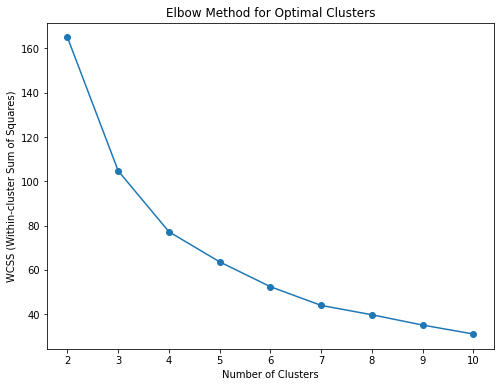

In [8]:
# Determine the number of clusters using the elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    

# Plot elbow curve to choose the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.show()

In [9]:
# Apply KMeans clustering with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [10]:
# Cluster centers
centers = kmeans.cluster_centers_

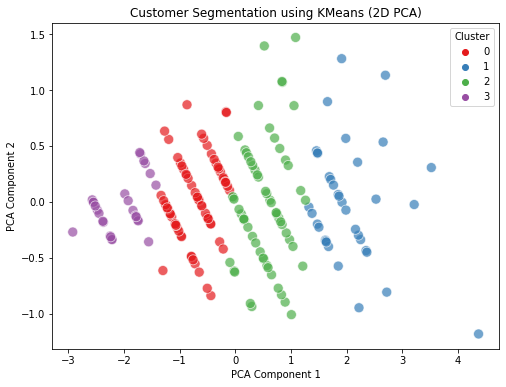

In [12]:
# Visualize the clusters using PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title("Customer Segmentation using KMeans (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [13]:
# Calculate Davies-Bouldin Index (DBI) and Silhouette Score for cluster quality
db_index = davies_bouldin_score(scaled_features, data['Cluster'])
silhouette_avg = silhouette_score(scaled_features, data['Cluster'])

print(f"DB Index: {db_index:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")


DB Index: 0.799
Silhouette Score: 0.402
